In [1]:
import quandl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
oil = quandl.get("NSE/OIL", authtoken="vEjGTysiCFBuN-z5bjGP",
                 start_date="1980-01-01",
                 end_date="2020-01-01")

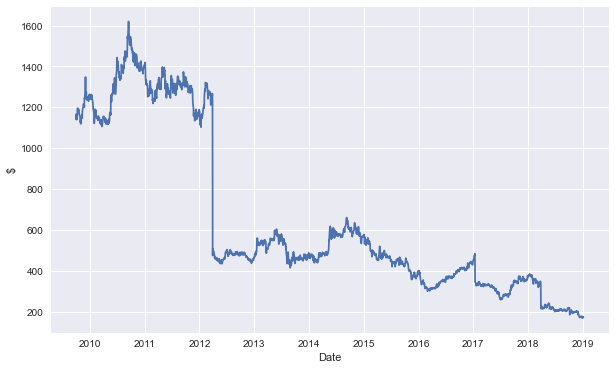

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(oil.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.savefig('images/Oil_Price.png')
plt.show()

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
ticker = '^GSPC'
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2022, 3, 3)
SP_prices = yf.download(ticker, start=start, end=end, interval='1mo').Close

[*********************100%***********************]  1 of 1 completed


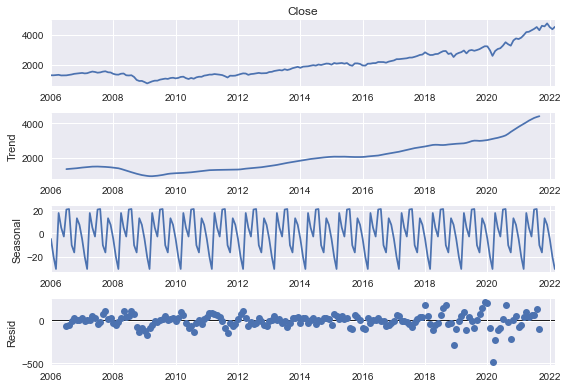

In [6]:
seasonal_decompose(SP_prices, period=12).plot()
plt.savefig('images/decomposition.png')
plt.show()

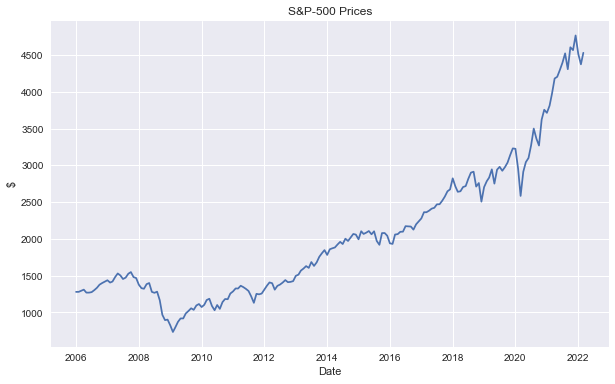

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(SP_prices)
plt.title('S&P-500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.savefig('images/SP_price.png')
plt.show()

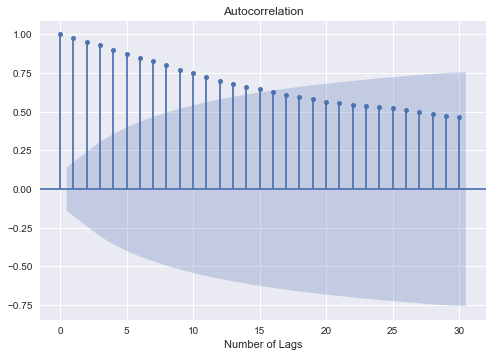

In [8]:
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.savefig('images/acf_SP.png')
plt.show()

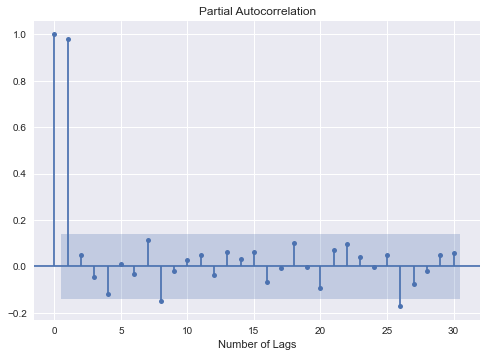

In [9]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.savefig('images/pacf_SP.png')
plt.show()

In [11]:
from fredapi import Fred
import statsmodels.api as sm

In [12]:
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')#insert you api key

In [21]:
energy = fred.get_series("CAPUTLG2211A2S",
                         observation_start="2010-01-01",
                         observation_end="2020-12-31") #Accessing the energy capacity utilization from Fred database for the period of 2010-2020.
energy.head(12)

2010-01-01    83.7028
2010-02-01    84.9324
2010-03-01    82.0379
2010-04-01    79.5073
2010-05-01    82.8055
2010-06-01    84.4108
2010-07-01    83.6338
2010-08-01    83.7961
2010-09-01    83.7459
2010-10-01    80.8892
2010-11-01    81.7758
2010-12-01    85.9894
dtype: float64

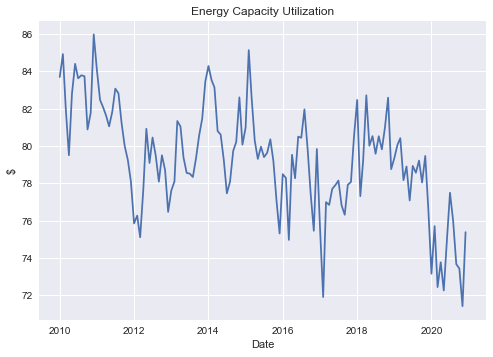

In [22]:
plt.plot(energy)
plt.title('Energy Capacity Utilization')
plt.ylabel('$')
plt.xlabel('Date')
plt.savefig('images/energy.png')
plt.show()

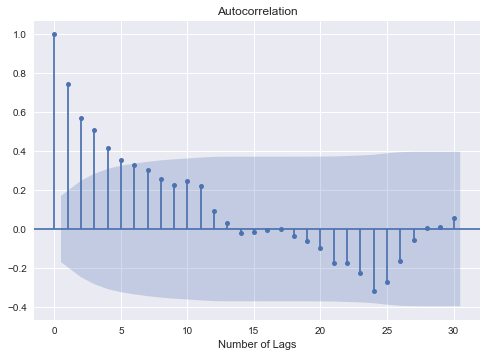

In [23]:
sm.graphics.tsa.plot_acf(energy, lags=30)
plt.xlabel('Number of Lags')
plt.savefig('images/energy_acf.png')
plt.show()